Train dataset: [414, 500, 500, 500, 250]


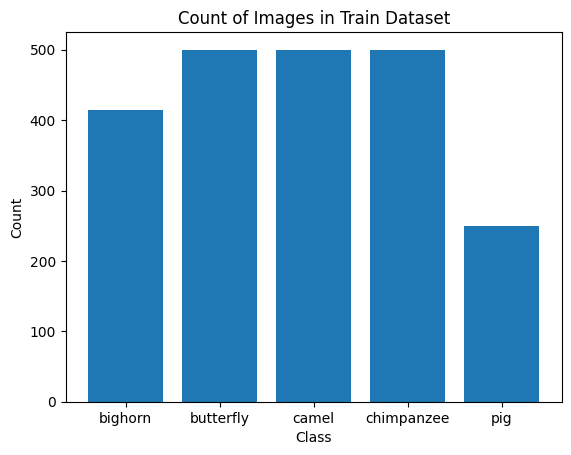

Test dataset [50, 50, 50, 50, 50]


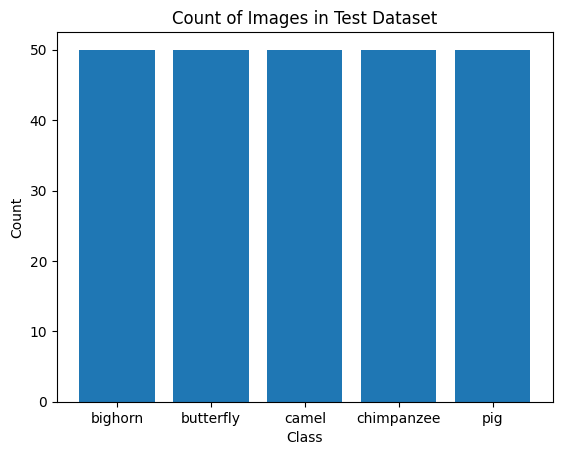

Shape of x_train: (2164, 64, 64, 3)
Shape of x_test: (250, 64, 64, 3)
Shape of y_test after categorizing: (250, 5)
Shape of x_train after augmentation: (2500, 64, 64, 3)
Train dataset after augmentation: [500, 500, 500, 500, 500]


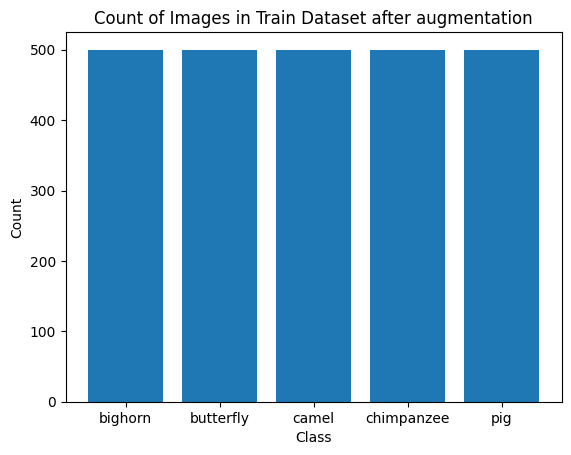

Shape of resized x_train: (2500, 224, 224, 3)
Shape of x_train after reshaping: (2500, 224, 224, 3)
Shape of resized x_train: (250, 224, 224, 3)
Shape of x_test after reshaping: (250, 224, 224, 3)
Shape of y_train after categorizing: (2500, 5)


In [169]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical, plot_model
from skimage import io, color
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import random
from skimage.transform import resize

train_folder_path = "./train/"
test_folder_path = "./test/"

train_subfolders = [f for f in os.listdir(train_folder_path) if os.path.isdir(os.path.join(train_folder_path, f))]
test_subfolders = [f for f in os.listdir(test_folder_path) if os.path.isdir(os.path.join(test_folder_path, f))]

image_files = []
image_files_path = []
y_train = []
for subfolder in train_subfolders:
    subfolder_path = os.path.join(train_folder_path, subfolder)
    files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f)) and f.endswith((".JPEG"))]
    image_files_path.extend([os.path.join(subfolder_path, f) for f in files])
    image_files.extend(files)
    if(subfolder == "pig"):
        y_train.extend([4] * len(files))
    elif(subfolder == "chimpanzee"):
        y_train.extend([3] * len(files))
    elif(subfolder == "camel"):
        y_train.extend([2] * len(files))
    elif(subfolder == "butterfly"):
        y_train.extend([1] * len(files))
    elif(subfolder == "bighorn"):
        y_train.extend([0] * len(files))

test_image_files = []
test_image_files_path = []
y_test = []
for subfolder in test_subfolders:
    subfolder_path = os.path.join(test_folder_path, subfolder)
    files = [f for f in os.listdir(subfolder_path) if os.path.isfile(os.path.join(subfolder_path, f)) and f.endswith((".JPEG"))]
    test_image_files_path.extend([os.path.join(subfolder_path, f) for f in files])
    test_image_files.extend(files)
    if(subfolder == "pig"):
        y_test.extend([4] * len(files))
    elif(subfolder == "chimpanzee"):
        y_test.extend([3] * len(files))
    elif(subfolder == "camel"):
        y_test.extend([2] * len(files))
    elif(subfolder == "butterfly"):
        y_test.extend([1] * len(files))
    elif(subfolder == "bighorn"):
        y_test.extend([0] * len(files))

images = []
for file in range(len(image_files)):
    image_path = image_files_path[file]
    image = io.imread(image_path)
    if(len(image.shape)<3):
        image = color.gray2rgb(image)
    
    images.append(image)

test_images = []
for file in range(len(test_image_files)):
    image_path = test_image_files_path[file]
    image = io.imread(image_path)
    if(len(image.shape)<3):
        image = color.gray2rgb(image)
    
    test_images.append(image)

countTrain = [0, 0, 0, 0, 0]
for i in range(len(y_train)):
    if(y_train[i] == 0):
        countTrain[0] += 1
    elif(y_train[i] == 1):
        countTrain[1] += 1
    elif(y_train[i] == 2):
        countTrain[2] += 1
    elif(y_train[i] == 3):
        countTrain[3] += 1
    elif(y_train[i] == 4):
        countTrain[4] += 1

print("Train dataset:", countTrain)

labels = ['bighorn', 'butterfly', 'camel', 'chimpanzee', 'pig']

plt.bar(labels, countTrain)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Images in Train Dataset')
plt.show()

count = [0, 0, 0, 0, 0]
for i in range(len(y_test)):
    if(y_test[i] == 0):
        count[0] += 1
    elif(y_test[i] == 1):
        count[1] += 1
    elif(y_test[i] == 2):
        count[2] += 1
    elif(y_test[i] == 3):
        count[3] += 1
    elif(y_test[i] == 4):
        count[4] += 1

print("Test dataset", count)

plt.bar(labels, count)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Images in Test Dataset')
plt.show()

x_train = np.array(images)
print("Shape of x_train:", x_train.shape)



x_test = np.array(test_images)
print("Shape of x_test:", x_test.shape)





y_test = to_categorical(y_test, num_classes=len(test_subfolders))
print("Shape of y_test after categorizing:", y_test.shape)




# Create an ImageDataGenerator object with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate the image by a random angle between -10 and 10 degrees
    width_shift_range=0.1,  # Shift the image horizontally by a random fraction of the total width
    height_shift_range=0.1,  # Shift the image vertically by a random fraction of the total height
    shear_range=0.1,  # Apply shear transformation with a random shear angle between -10 and 10 degrees
    zoom_range=0.1,  # Apply random zoom between 0.9 and 1.1
    horizontal_flip=True,  # Flip the image horizontally
    vertical_flip=False  # Do not flip the image vertically
)

while countTrain[0] != max(countTrain):
    randomNumber = np.random.randint(0, len(x_train))
    while y_train[randomNumber] != 0:
        randomNumber = np.random.randint(0, len(x_train))
    randomImage = x_train[randomNumber]
    randomImage = randomImage.reshape(1, 64, 64, 3)

    for batch in datagen.flow(randomImage, batch_size=1):
        # io.imshow(batch.reshape(64,64,3)/255)
        # plt.show()
        x_train = np.append(x_train, batch.reshape(1,64,64,3), axis=0)
        y_train.extend([0])
        countTrain[0] += 1
        break

while countTrain[4] != max(countTrain):
    randomNumber = np.random.randint(0, len(x_train))
    while y_train[randomNumber] != 4:
        randomNumber = np.random.randint(0, len(x_train))
    randomImage = x_train[randomNumber]
    randomImage = randomImage.reshape(1, 64, 64, 3)
    for batch in datagen.flow(randomImage, batch_size=1):
        x_train = np.append(x_train, batch.reshape(1,64,64,3), axis=0)
        y_train.extend([4])
        countTrain[4] += 1
        break


print("Shape of x_train after augmentation:", x_train.shape)
# print("y_train after augmentation:", y_train)

countTrain = [0, 0, 0, 0, 0]
for i in range(len(y_train)):
    if(y_train[i] == 0):
        countTrain[0] += 1
    elif(y_train[i] == 1):
        countTrain[1] += 1
    elif(y_train[i] == 2):
        countTrain[2] += 1
    elif(y_train[i] == 3):
        countTrain[3] += 1
    elif(y_train[i] == 4):
        countTrain[4] += 1

print("Train dataset after augmentation:", countTrain)

labels = ['bighorn', 'butterfly', 'camel', 'chimpanzee', 'pig']

plt.bar(labels, countTrain)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Images in Train Dataset after augmentation')
plt.show()


resized_x_train = []
for image in x_train:
    resized_image = resize(image, (224, 224, 3))
    resized_x_train.append(resized_image)

resized_x_train = np.array(resized_x_train)
print("Shape of resized x_train:", resized_x_train.shape)

x_train = resized_x_train


# x_train = x_train.reshape(x_train.shape[0], -1)
print("Shape of x_train after reshaping:", x_train.shape)

resized_x_test = []
for image in x_test:
    resized_image = resize(image, (224, 224, 3))
    resized_x_test.append(resized_image)

resized_x_test = np.array(resized_x_test)

x_test = resized_x_test
print("Shape of resized x_train:", x_test.shape)

# x_test = x_test.reshape(x_test.shape[0], -1)
print("Shape of x_test after reshaping:", x_test.shape)

y_train = to_categorical(y_train, num_classes=len(train_subfolders))
print("Shape of y_train after categorizing:", y_train.shape)


In [170]:
# # Get the indices of images where y_train is 4
# indices = [i for i, label in enumerate(y_train) if label == 4]

# # Randomly select 10 indices
# random_indices = random.sample(indices, 10)

# # Show the images and print their serial numbers
# for i, index in enumerate(random_indices):
#     image = x_train[index]/255
#     serial_number = index + 1  # Serial numbers start from 1

#     print(image.shape)
#     io.imshow(image)
#     plt.title(f'Serial Number: {serial_number}, Class: {y_train[index]}')
#     plt.axis('off')
#     plt.show()
    
#     # plt.imshow(image[])
#     # plt.title(f'Serial Number: {serial_number}')
#     # plt.axis('off')



In [171]:
model = Sequential()
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))

model.add(Dense(4096, activation='relu'))

model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

plot_model(model, to_file='model1.png', show_shapes=True, show_layer_names=True)

# model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

model.summary()


Python(88177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(88178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_627 (Conv2D)         (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_82 (MaxPooli  (None, 26, 26, 96)        0         
 ng2D)                                                           
                                                                 
 conv2d_628 (Conv2D)         (None, 26, 26, 256)       614656    
                                                                 
 max_pooling2d_83 (MaxPooli  (None, 12, 12, 256)       0         
 ng2D)                                                           
                                                                 
 conv2d_629 (Conv2D)         (None, 12, 12, 384)       885120    
                                                                 
 conv2d_630 (Conv2D)         (None, 12, 12, 384)     

In [172]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32, verbose=1)

y_pred = model.predict(x_test)
print(y_pred.shape)

Epoch 1/50
79/79 [==============================] - 61s 761ms/step - loss: 75.2122 - accuracy: 0.2036 - val_loss: 1.6097 - val_accuracy: 0.2000
Epoch 2/50
79/79 [==============================] - 55s 692ms/step - loss: 1.6139 - accuracy: 0.1952 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 3/50
79/79 [==============================] - 56s 706ms/step - loss: 1.6099 - accuracy: 0.1932 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 4/50
79/79 [==============================] - 55s 699ms/step - loss: 1.6096 - accuracy: 0.1952 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 5/50
79/79 [==============================] - 56s 702ms/step - loss: 1.6096 - accuracy: 0.1860 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 6/50
79/79 [==============================] - 54s 685ms/step - loss: 1.6097 - accuracy: 0.1952 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 7/50
79/79 [==============================] - 57s 721ms/step - loss: 1.6095 - accuracy: 0.1956 - val_loss: 1.6094 - val_accuracy: 0.200

{'loss': [75.212158203125, 1.6138935089111328, 1.609906554222107, 1.609634518623352, 1.609614610671997, 1.6096619367599487, 1.6095385551452637, 1.6095842123031616, 1.6096010208129883, 1.609592318534851, 1.6095391511917114, 1.6095974445343018, 1.6095266342163086, 1.609615683555603, 1.609570860862732, 1.6095950603485107, 1.6095601320266724, 1.609580159187317, 1.6095741987228394, 1.6096093654632568, 1.6096198558807373, 1.6096004247665405, 1.6095893383026123, 1.6095272302627563, 1.6095809936523438, 1.6095553636550903, 1.6095486879348755, 1.6095950603485107, 1.6095632314682007, 1.6095777750015259, 1.60954749584198, 1.6095788478851318, 1.6095211505889893, 1.6095848083496094, 1.609588861465454, 1.6095701456069946, 1.6095848083496094, 1.6096488237380981, 1.609571099281311, 1.6096395254135132, 1.6095243692398071, 1.6095317602157593, 1.6095505952835083, 1.609595537185669, 1.6095770597457886, 1.6095669269561768, 1.6095259189605713, 1.6095941066741943, 1.6095534563064575, 1.6096091270446777], 'acc

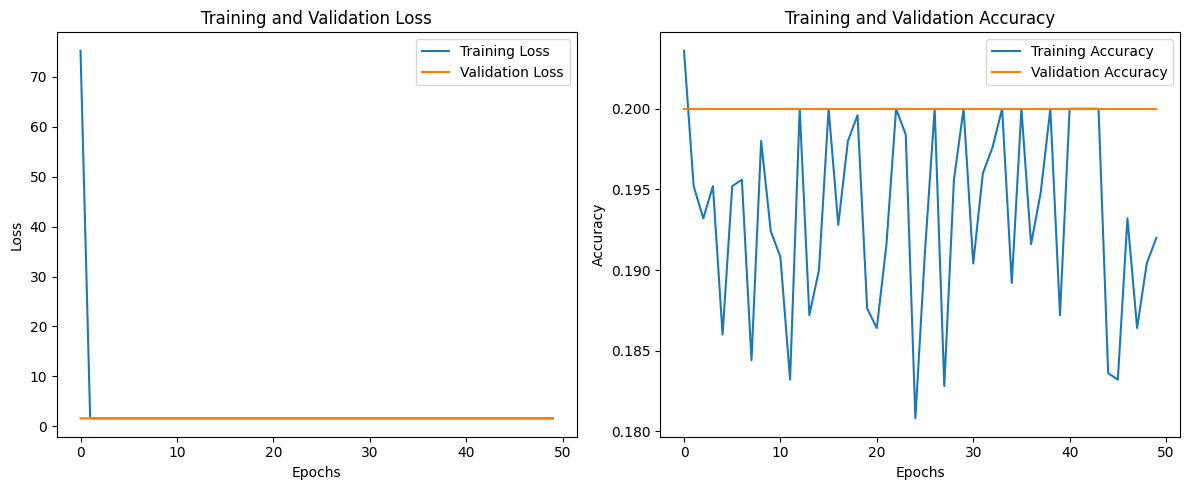

In [173]:
# Access training history
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

print(history.history)

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

8/8 [==============================] - 1s 172ms/step
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249]


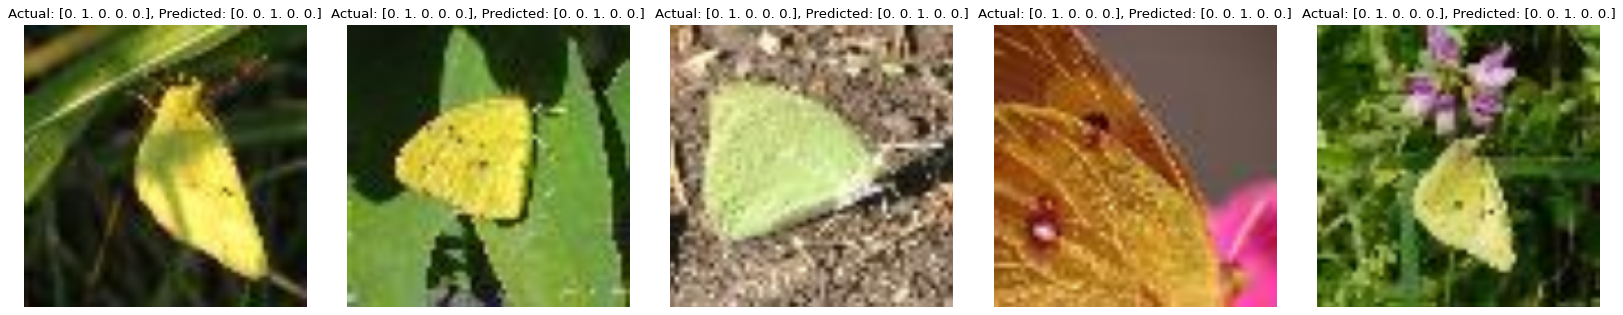

In [174]:
predictions = np.argmax(model.predict(x_test), axis=1)

# print(predictions)

predictions = to_categorical(predictions, num_classes=len(test_subfolders))
# print(predictions)
# print(y_test)
# Find misclassified indices
misclassified_indices = []
for i in range(len(predictions)):
  if not np.array_equal(predictions[i], y_test[i]):
      misclassified_indices.append(i)

print(misclassified_indices)
# misclassified_indices = np.where(predictions != y_test)[0]

# Display some misclassified images along with their actual labels
num_misclassified_to_display = 5  # Change this based on how many images you want to display

plt.figure(figsize=(20, 40), dpi=80)
for i in range(min(num_misclassified_to_display, len(misclassified_indices))):

  plt.subplot(1, num_misclassified_to_display, i + 1)
  index = misclassified_indices[i]
  plt.imshow(x_test[index])  # Assuming images are in the range [0, 255]
  plt.title(f'Actual: {y_test[index]}, Predicted: {predictions[index]}')
  plt.tight_layout()
  plt.axis('off')

plt.show()

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# Calculate accuracy
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print("Accuracy:", accuracy)

# Calculate confusion matrix
confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print("Confusion Matrix:")
print(confusion_mat)

# Calculate F1 score
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("F1 Score:", f1)


Accuracy: 0.2
Confusion Matrix:
[[ 0  0 50  0  0]
 [ 0  0 50  0  0]
 [ 0  0 50  0  0]
 [ 0  0 50  0  0]
 [ 0  0 50  0  0]]
F1 Score: 0.06666666666666667


In [176]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras.layers import AveragePooling2D

def identity_block(X, filters):
    F1, F2, F3 = filters
    
    X_shortcut = X
    
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=F2, kernel_size=(3, 3), strides=(1, 1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

def convolutional_block(X, filters, stride=2):
    F1, F2, F3 = filters
    
    X_shortcut = X
    
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(stride, stride), padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=F2, kernel_size=(3, 3), strides=(1, 1), padding='same')(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid')(X)
    X = BatchNormalization(axis=3)(X)
    
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(stride, stride), padding='valid')(X_shortcut)
    X_shortcut = BatchNormalization(axis=3)(X_shortcut)
    
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

def ResNet34(input_shape=(224, 224, 3), classes=5):
    X_input = tf.keras.Input(input_shape)
    
    X = Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), padding='same')(X_input)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(X)
    
    X = convolutional_block(X, filters=[64, 64, 256], stride=1)
    X = identity_block(X, filters=[64, 64, 256])
    X = identity_block(X, filters=[64, 64, 256])
    
    X = convolutional_block(X, filters=[128, 128, 512], stride=2)
    X = identity_block(X, filters=[128, 128, 512])
    X = identity_block(X, filters=[128, 128, 512])
    X = identity_block(X, filters=[128, 128, 512])
    
    X = convolutional_block(X, filters=[256, 256, 1024], stride=2)
    X = identity_block(X, filters=[256, 256, 1024])
    X = identity_block(X, filters=[256, 256, 1024])
    X = identity_block(X, filters=[256, 256, 1024])
    X = identity_block(X, filters=[256, 256, 1024])
    X = identity_block(X, filters=[256, 256, 1024])
    
    X = convolutional_block(X, filters=[512, 512, 2048], stride=2)
    X = identity_block(X, filters=[512, 512, 2048])
    X = identity_block(X, filters=[512, 512, 2048])
    
    X = AveragePooling2D(pool_size=(2, 2))(X)
    
    X = Flatten()(X)
    X = Dense(classes, activation='softmax')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet34')
    
    return model

# Create the ResNet-34 model
model = ResNet34()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

plot_model(model, to_file='model2.png', show_shapes=True, show_layer_names=True)

model.summary()



Python(88547) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(88548) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_632 (Conv2D)         (None, 112, 112, 64)         9472      ['input_7[0][0]']             
                                                                                                  
 batch_normalization_523 (B  (None, 112, 112, 64)         256       ['conv2d_632[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_519 (Activation  (None, 112, 112, 64)         0         ['batch_normalization_5

In [177]:
# Train the model
history2 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32, verbose=1)

Epoch 1/20
79/79 [==============================] - 316s 4s/step - loss: 2.4450 - accuracy: 0.4208 - val_loss: 1.7082 - val_accuracy: 0.2000
Epoch 2/20
79/79 [==============================] - 308s 4s/step - loss: 1.8271 - accuracy: 0.4576 - val_loss: 52.9205 - val_accuracy: 0.2000
Epoch 3/20
79/79 [==============================] - 313s 4s/step - loss: 1.1687 - accuracy: 0.5352 - val_loss: 2.9412 - val_accuracy: 0.2000
Epoch 4/20
79/79 [==============================] - 302s 4s/step - loss: 1.2162 - accuracy: 0.5612 - val_loss: 3.2040 - val_accuracy: 0.2000
Epoch 5/20
79/79 [==============================] - 302s 4s/step - loss: 1.0366 - accuracy: 0.5732 - val_loss: 2.9588 - val_accuracy: 0.2000
Epoch 6/20
79/79 [==============================] - 301s 4s/step - loss: 1.1883 - accuracy: 0.5756 - val_loss: 3.2745 - val_accuracy: 0.2000
Epoch 7/20
79/79 [==============================] - 294s 4s/step - loss: 1.1649 - accuracy: 0.5932 - val_loss: 1.8675 - val_accuracy: 0.2000
Epoch 8/20
7

{'loss': [2.444974422454834, 1.8270775079727173, 1.1687284708023071, 1.2161717414855957, 1.036624550819397, 1.1882575750350952, 1.164881706237793, 1.1636370420455933, 0.9956558346748352, 0.9032993316650391, 0.9002736210823059, 0.8885129690170288, 0.8460133671760559, 0.7807391881942749, 0.7975489497184753, 0.7401127815246582, 0.8244075179100037, 0.9062941670417786, 0.702168881893158, 0.7614780068397522], 'accuracy': [0.42080000042915344, 0.4575999975204468, 0.5351999998092651, 0.5612000226974487, 0.573199987411499, 0.5756000280380249, 0.5932000279426575, 0.5756000280380249, 0.6096000075340271, 0.6359999775886536, 0.6416000127792358, 0.6531999707221985, 0.6692000031471252, 0.6899999976158142, 0.692799985408783, 0.7143999934196472, 0.6972000002861023, 0.6723999977111816, 0.7343999743461609, 0.7139999866485596], 'val_loss': [1.7082265615463257, 52.920509338378906, 2.9412434101104736, 3.204010009765625, 2.958806037902832, 3.27449107170105, 1.8674931526184082, 4.2102203369140625, 4.397298336

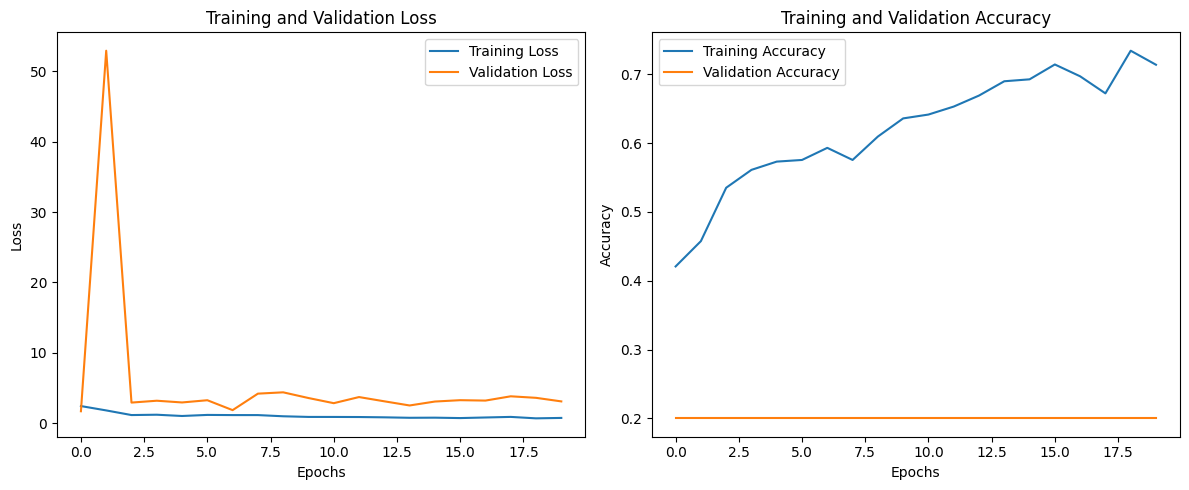

In [178]:
# Access training history
train_loss = history2.history['loss']
train_acc = history2.history['accuracy']
val_loss = history2.history['val_loss']
val_acc = history2.history['val_accuracy']

print(history2.history)

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

8/8 [==============================] - 6s 738ms/step
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249]


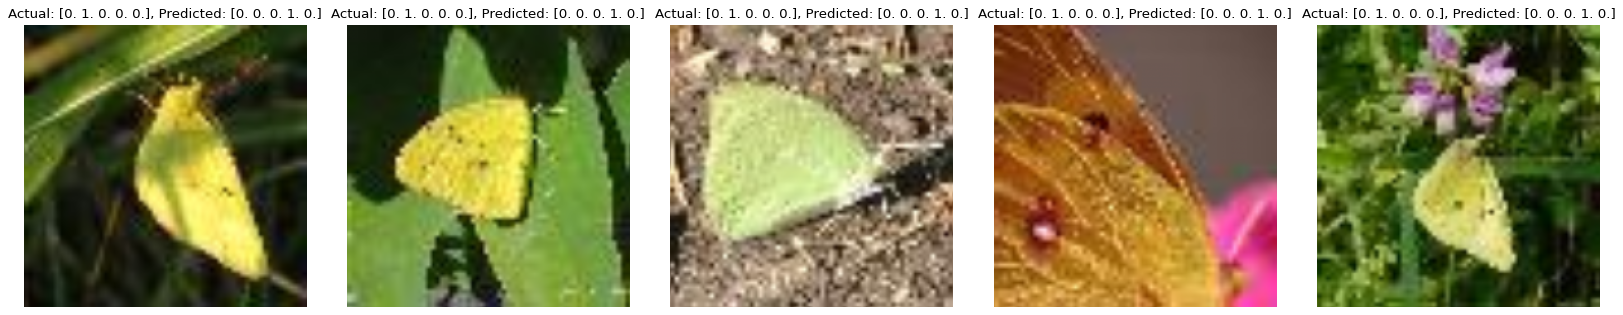

Accuracy: 0.2
Confusion Matrix:
[[ 0  0  0 50  0]
 [ 0  0  0 50  0]
 [ 0  0  0 50  0]
 [ 0  0  0 50  0]
 [ 0  0  0 50  0]]
F1 Score: 0.06666666666666667


In [179]:
predictions = np.argmax(model.predict(x_test), axis=1)

# print(predictions)

predictions = to_categorical(predictions, num_classes=len(test_subfolders))
# print(predictions)
# print(y_test)
# Find misclassified indices
misclassified_indices = []
for i in range(len(predictions)):
  if not np.array_equal(predictions[i], y_test[i]):
      misclassified_indices.append(i)

print(misclassified_indices)
# misclassified_indices = np.where(predictions != y_test)[0]

# Display some misclassified images along with their actual labels
num_misclassified_to_display = 5  # Change this based on how many images you want to display

plt.figure(figsize=(20, 40), dpi=80)
for i in range(min(num_misclassified_to_display, len(misclassified_indices))):

  plt.subplot(1, num_misclassified_to_display, i + 1)
  index = misclassified_indices[i]
  plt.imshow(x_test[index])  # Assuming images are in the range [0, 255]
  plt.title(f'Actual: {y_test[index]}, Predicted: {predictions[index]}')
  plt.tight_layout()
  plt.axis('off')

plt.show()

accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print("Accuracy:", accuracy)

# Calculate confusion matrix
confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print("Confusion Matrix:")
print(confusion_mat)

# Calculate F1 score
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("F1 Score:", f1)


In [180]:
from tensorflow.keras.applications import InceptionV3

resized_x_train = []
for image in x_train:
    resized_image = resize(image, (299, 299, 3))
    resized_x_train.append(resized_image)

resized_x_train = np.array(resized_x_train)
print("Shape of resized x_train:", resized_x_train.shape)

x_train = resized_x_train


# x_train = x_train.reshape(x_train.shape[0], -1)
print("Shape of x_train after reshaping:", x_train.shape)

resized_x_test = []
for image in x_test:
    resized_image = resize(image, (299, 299, 3))
    resized_x_test.append(resized_image)

resized_x_test = np.array(resized_x_test)

x_test = resized_x_test
print("Shape of resized x_train:", x_test.shape)

# x_test = x_test.reshape(x_test.shape[0], -1)
print("Shape of x_test after reshaping:", x_test.shape)

# Load the InceptionNet model
model = InceptionV3(weights=None ,include_top=True, input_shape=(299, 299, 3), classes=5)

# model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

plot_model(model, to_file='model3.png', show_shapes=True, show_layer_names=True)

model.summary()



Shape of resized x_train: (2500, 299, 299, 3)
Shape of x_train after reshaping: (2500, 299, 299, 3)
Shape of resized x_train: (250, 299, 299, 3)
Shape of x_test after reshaping: (250, 299, 299, 3)


Python(92311) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(92312) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d_685 (Conv2D)         (None, 149, 149, 32)         864       ['input_8[0][0]']             
                                                                                                  
 batch_normalization_576 (B  (None, 149, 149, 32)         96        ['conv2d_685[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_568 (Activation  (None, 149, 149, 32)         0         ['batch_normalizati

In [181]:
import numpy as np

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

# Train the model
history3 = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
79/79 [==============================] - 385s 5s/step - loss: 1.2812 - accuracy: 0.4840 - val_loss: 2.9212 - val_accuracy: 0.2000
Epoch 2/10
79/79 [==============================] - 375s 5s/step - loss: 1.0938 - accuracy: 0.5540 - val_loss: 3.6132 - val_accuracy: 0.2000
Epoch 3/10
79/79 [==============================] - 375s 5s/step - loss: 1.0377 - accuracy: 0.5844 - val_loss: 2.1773 - val_accuracy: 0.2000
Epoch 4/10
79/79 [==============================] - 375s 5s/step - loss: 1.0402 - accuracy: 0.5756 - val_loss: 3.5337 - val_accuracy: 0.2000
Epoch 5/10
79/79 [==============================] - 374s 5s/step - loss: 1.0433 - accuracy: 0.5944 - val_loss: 7.3813 - val_accuracy: 0.2000
Epoch 6/10
79/79 [==============================] - 375s 5s/step - loss: 0.9750 - accuracy: 0.6276 - val_loss: 2.0136 - val_accuracy: 0.2000
Epoch 7/10
79/79 [==============================] - 375s 5s/step - loss: 0.9174 - accuracy: 0.6376 - val_loss: 2.4531 - val_accuracy: 0.2000
Epoch 8/10
79

{'loss': [1.2812162637710571, 1.0937892198562622, 1.037660002708435, 1.040189504623413, 1.0433377027511597, 0.9750158190727234, 0.9173530340194702, 0.8830722570419312, 0.8817034959793091, 0.8385874032974243], 'accuracy': [0.48399999737739563, 0.5540000200271606, 0.5843999981880188, 0.5756000280380249, 0.5943999886512756, 0.6276000142097473, 0.6376000046730042, 0.6547999978065491, 0.659600019454956, 0.6740000247955322], 'val_loss': [2.9211785793304443, 3.6131932735443115, 2.177309036254883, 3.53373646736145, 7.3813395500183105, 2.0136148929595947, 2.453073024749756, 3.0594043731689453, 2.0362746715545654, 2.485111713409424], 'val_accuracy': [0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224, 0.20000000298023224]}


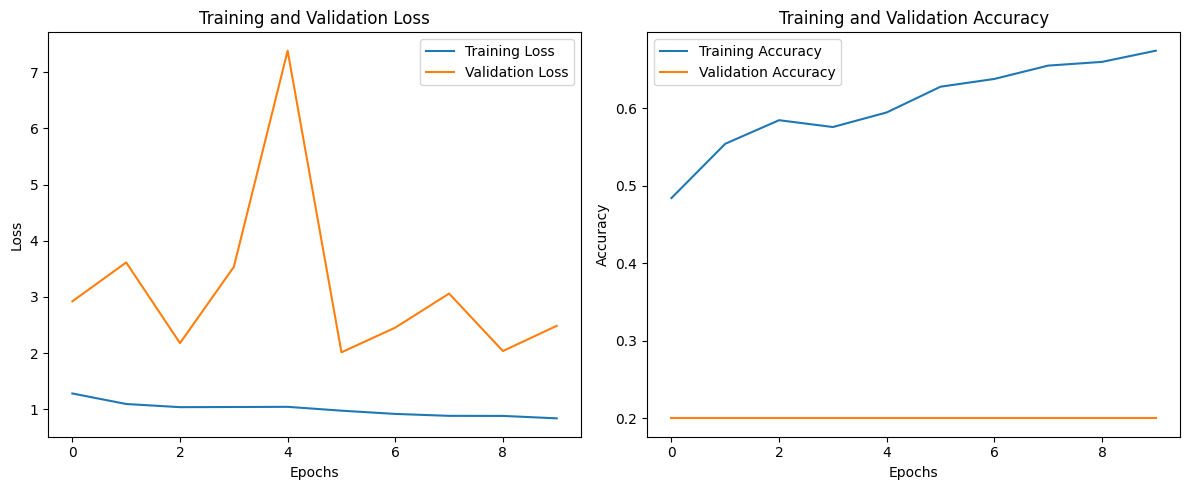

In [182]:
# Access training history
train_loss = history3.history['loss']
train_acc = history3.history['accuracy']
val_loss = history3.history['val_loss']
val_acc = history3.history['val_accuracy']

print(history3.history)

# Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

8/8 [==============================] - 8s 954ms/step
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]


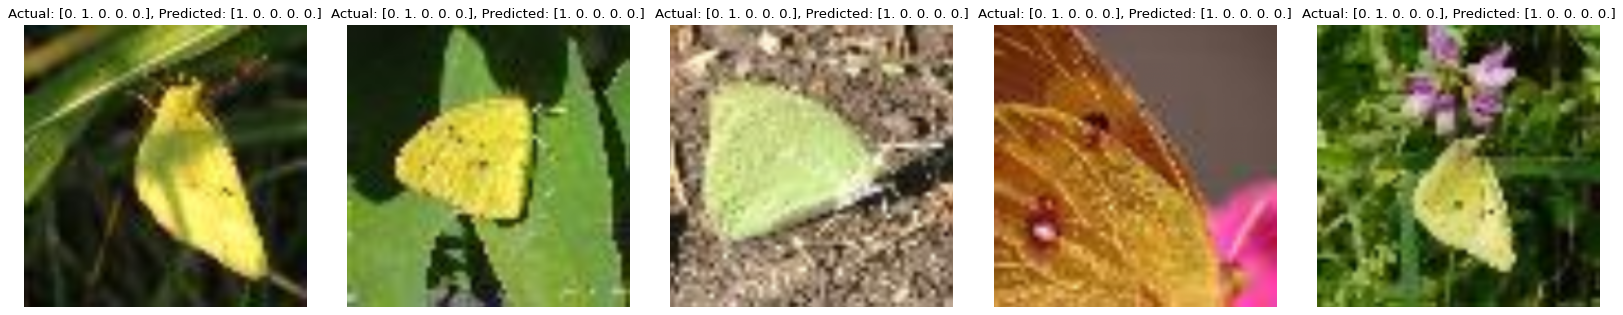

Accuracy: 0.2
Confusion Matrix:
[[50  0  0  0  0]
 [50  0  0  0  0]
 [50  0  0  0  0]
 [50  0  0  0  0]
 [50  0  0  0  0]]
F1 Score: 0.06666666666666667


In [183]:
predictions = np.argmax(model.predict(x_test), axis=1)

# print(predictions)

predictions = to_categorical(predictions, num_classes=len(test_subfolders))
# print(predictions)
# print(y_test)
# Find misclassified indices
misclassified_indices = []
for i in range(len(predictions)):
  if not np.array_equal(predictions[i], y_test[i]):
      misclassified_indices.append(i)

print(misclassified_indices)
# misclassified_indices = np.where(predictions != y_test)[0]

# Display some misclassified images along with their actual labels
num_misclassified_to_display = 5  # Change this based on how many images you want to display

plt.figure(figsize=(20, 40), dpi=80)
for i in range(min(num_misclassified_to_display, len(misclassified_indices))):

  plt.subplot(1, num_misclassified_to_display, i + 1)
  index = misclassified_indices[i]
  plt.imshow(x_test[index])  # Assuming images are in the range [0, 255]
  plt.title(f'Actual: {y_test[index]}, Predicted: {predictions[index]}')
  plt.tight_layout()
  plt.axis('off')

plt.show()

accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print("Accuracy:", accuracy)

# Calculate confusion matrix
confusion_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1))
print("Confusion Matrix:")
print(confusion_mat)

# Calculate F1 score
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(predictions, axis=1), average='weighted')
print("F1 Score:", f1)
